# Linear (and mixed-integer linear) programming


> During this session, we will use *IPython Notebook*. The current webpage embeds a Python interpreter. Each cell may be either text (Markdown) or code (Python) to be executed. All cells may be edited (double-click) and transformed (`Maj+Enter`) into text or passed to the interpreter. The result given by the interpreter and possible graphical representations appear below.

Note that:
- the current file is automatically saved as you work;
- you may add cells with the `+` icon and choose their type (code or Markdown) in the corresponding drop menu.


## Introduction

We will use and import the `pulp` library. `pulp` gives access to a mixed-integer linear programming API that we will use. A free open-source solver named `coin` is embedded within the package, but it is also possible to bind commercial solvers like CPLEX or GUROBI. Ask your instructor if need be.

Click on the cell and `Ctrl+Enter` to execute the Python command.

In [1]:
import pulp

# Regular imports for plotting
# numpy always helps!

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

<div class="alert alert-success">
<b>Example :</b><br />
Find values for $x,y > 0$ such that $x+2\,y <= 8$ et $2\,x+y<= 8$ and as to maximize $x + y$
</div>

*Graphical interpretation:*

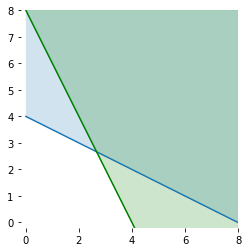

In [2]:
def graphical_interpretation():
    ax = plt.axes(frameon=False, aspect=1)
    plt.xlim(-.2, 8), plt.ylim(-.2, 8)
    x = np.arange(10)
    plt.plot ((8 - x)/2)
    plt.plot ((8 - 2*x), 'g')
    plt.fill_between(x, (8 - x)/2, 8 + 0*x, alpha=0.2)
    plt.fill_between(x, (8 - 2*x), 8 + 0*x, color='g', alpha=0.2)

graphical_interpretation()


In [3]:
# First we create a problem
prob = pulp.LpProblem("exemple", pulp.LpMaximize)

# We declare and name the variables
# **WARNING** All variables must have a different name
x = pulp.LpVariable("x", 0, None) # lower bound, upper bound (None means unbounded)
y = pulp.LpVariable("y", 0, None)

# Add constraints to the problem
prob += x + 2 * y <= 8
prob += 2 * x + y <= 8

# If an expression is added, it is interpreted as the objective function
prob += x + y

# Then we solve it!
status = prob.solve()

In [4]:
# Check the status of the resolution
pulp.LpStatus[status]

'Optimal'

(2.6666667, 2.6666667)

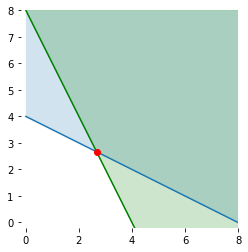

In [5]:
graphical_interpretation()

# Now we get the optimal value
plt.plot([x.value()], [y.value()], 'ro')

# By the way
x.value(), y.value()

<div class="alert alert-success">
**Attention:**
We got the solution of the linear programming problem, but let's say we want to work with integer values.
</div>

In [6]:
prob = pulp.LpProblem("example", pulp.LpMaximize)

x = pulp.LpVariable("x", 0, None, cat=pulp.LpInteger)
y = pulp.LpVariable("y", 0, None, cat=pulp.LpInteger)

prob += x + 2 * y <= 8
prob += 2 * x + y <= 8

prob += x + y

assert pulp.LpStatus[prob.solve()] == 'Optimal'
print ((pulp.value(x), pulp.value(y)))

(2.0, 3.0)


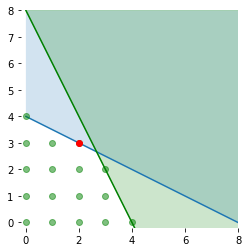

In [7]:
graphical_interpretation()

# Admissible solutions
plt.plot ([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4],
          [0, 1, 2 ,3 ,4, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 0],
          'go', alpha=.5)

# Now we get the optimal value
plt.plot([x.value()], [y.value()], 'ro')


## Linear programming

<div class="alert alert-warning">
<b>Problem #2: (easy)</b>
<p>
To meet the demands of its customers, a company manufactures its products in its own factories (inside production) or buys them from other companies (outside production). Inside production is subject to some resource constraints: each product consumes a certain amount of each resource. In contrast, outside production is theoretically unlimited.
</p><p>
The problem is to determine how much of each product should be produced inside and outside the company while minimizing the overall production cost, meeting the demand, and satisfying the resource constraints.
</p>
</div>

In [ ]:
## 1. Products
kluski = 0
capellini = 1
fettucine = 2
products = ['kluski', 'capellini', 'fettucine']
num_products = len(products)

## 2. Resources
flour = 0
eggs = 1
resources = ['flour', 'eggs']
num_resources = len(resources)

## 3. Costs, capacity and demand
consumption = [[0.5, 0.2], [0.4, 0.4], [0.3, 0.6]]
capacity = [20, 40]
demand = [100, 200, 300]
inside_cost = [0.6, 0.8, 0.3]
outside_cost = [0.8, 0.9, 0.4]

pb = pulp.LpProblem("pasta", pulp.LpMinimize)

## **--- add your code here ---


## **--- add your code here ---

assert pulp.LpStatus[pb.solve()] == 'Optimal'

print('Objective value: ', pb.objective.value())

for p in range(num_products):
    msg = "Production of {:<10} – inside: {:<4.1f} and outside: {:>4.1f}"
    print (msg.format(products[p], 0, 0))  # replace 0 by the correct value


## Integer programming

<div class="alert alert-warning">
<b>Problem #3: (easy) – The knapsack problem</b>
<p>
Given a set of items, each with a value and a weight, determine the number of each item to include in a collection (the knapsack) so that the total weight is less than or equal to a given limit and the total value is as large as possible. 
</p><p>
It derives its name from the problem faced by someone who is constrained by a fixed-size knapsack and must fill it with the most valuable items.
</p>
</div>

Our problem is a bit more complex: in place of the weight, each `item[i]` consumes `use[r][i]` from `resource[r]`.  
We must determine how many of each `item[i]` we choose to carry.


In [ ]:
capacity = [18209, 7692, 1333, 924, 26638, 61188, 13360]
value = [96, 76, 56, 11, 86, 10, 66, 86, 83, 12, 9, 81]

use = [[19, 1, 10, 1, 1, 14, 152, 11, 1, 1, 1, 1],
         [0, 4, 53, 0, 0, 80, 0, 4, 5, 0, 0, 0],
         [4, 660, 3, 0, 30, 0, 3, 0, 4, 90, 0, 0],
         [7, 0, 18, 6, 770, 330, 7, 0, 0, 6, 0, 0],
         [0, 20, 0, 4, 52, 3, 0, 0, 0, 5, 4, 0],
         [0, 0, 40, 70, 4, 63, 0, 0, 60, 0, 4, 0],
         [0, 32, 0, 0, 0, 5, 0, 3, 0, 660, 0, 9]]

## **--- add your code here ---






<div class="alert alert-warning">
<b>Problem #4: (easy) – The assignment problem</b>
<p>
The assignment problem is one of the fundamental combinatorial optimization problems.
In its most general form, the problem is as follows:
</p><p>
There are a number of agents and a number of tasks. Any agent can be assigned to perform any task, incurring some cost that may vary depending on the agent-task assignment. It is required to perform all tasks by assigning exactly one agent to each task in such a way that the total cost of the assignment is minimized.
</p>
</div>

In [ ]:
# Cost of allocating task j to agent i
c = [[13, 21, 20, 12, 8, 26, 22, 11],
     [12, 36, 25, 41, 40, 11, 4, 8],
     [35, 32, 13, 36, 26, 21, 13, 37],
     [34, 54, 7, 8, 12, 22, 11, 40],
     [21, 6, 45, 18, 24, 34, 12, 48],
     [42, 19, 39, 15, 14, 16, 28, 46],
     [16, 34, 38, 3, 34, 40, 22, 24],
     [26, 20, 5, 17, 45, 31, 37, 43]]

## **--- add your code here ---



## **--- add your code here ---

print('Objective value: ', pb.objective.value())

print('Assignment matrix:')
print (np.array([[p.value() for p in sub] for sub in x], dtype=int)) # replace x with your matrix of variables

## Mixed-Integer Linear Programming


<div class="alert alert-warning">
<b>Problem #5: (a tad more difficult) – Planning a week of electric production</b>
<p>
An electric utility company owns two power plants.<br/> The first plant can power no less than 50 and up to 400 MW for a production cost of 20€/MWh.<br/> The second plant can power no less than 20 and up to 200 MW for a production cost of 40€/MWh.<br/> An additional constraints states that a power plan, when powered on, must keep on for at least two consecutive hours.
</p><p>
The power plants must meet an electric demand during a week provided in an attached file (one line per hour).
</p>

</div>

In [ ]:
demand = np.loadtxt("demand.txt")
plt.plot(demand, 'r')

costs = np.array([20, 40])
power_max = np.array([400, 200])
power_min = np.array([50, 20])